In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

([], <a list of 0 Text major ticklabel objects>)

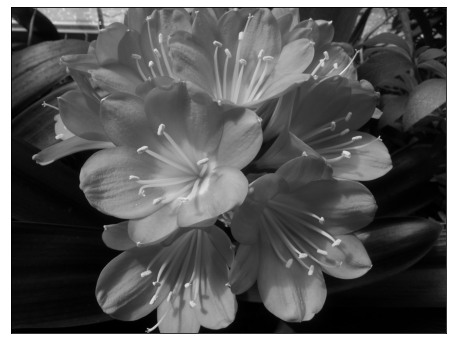

In [91]:
img = cv2.imread('src/flower1.jpg',0);
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,6))
plt.imshow(img);plt.xticks([]);plt.yticks([])

# Histogram Equalization
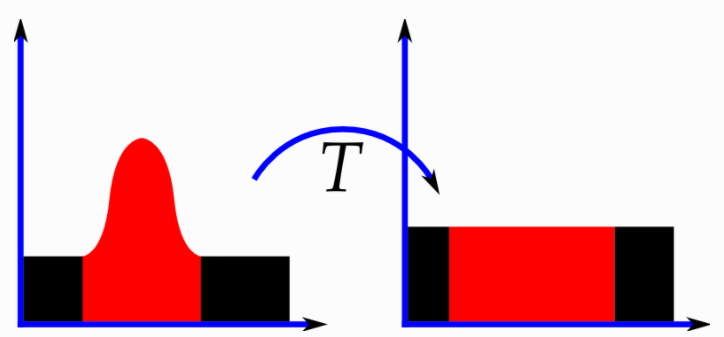

- 이미지 각 픽셀의 cumulative distribution function값을 구하고, Histogram Equalization 공식에 대입하여 0~255 사이 값으로 변환


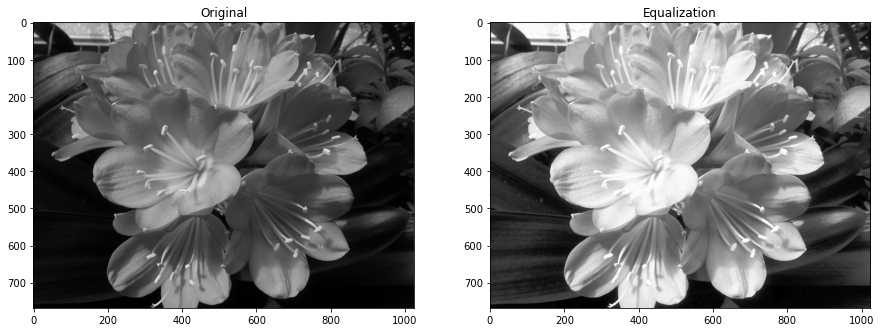

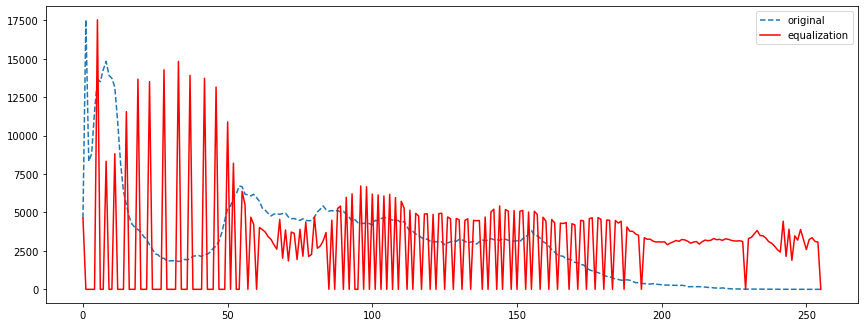

In [53]:
img = cv2.imread('src/flower1.jpg',0);
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

hist1 = cv2.calcHist([img], [0], None, [256], [0,256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0,256])
plt.figure(figsize = (15,12))
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.subplot(222),plt.imshow(img2),plt.title('Equalization')
plt.figure(figsize = (32,12))
plt.subplot(223),plt.plot(hist1,  label = 'original', linestyle = '--')
plt.plot(hist2, color = 'r', label = 'equalization')
plt.legend()
plt.show()

- Histogram Equalization의 결과는 밝은 이미지나 어두운 이미지 어떤 것을 사용해도 동일한 결과
- 즉 밝기에 영향을 받지 않고 동일한 환경에서 작업이 가능

## CLAHE(Contrast Limited Adaptive Histogram Equalization)
- 이미지를 작게 나누어 각각 적용 : 밝은 부분과 어두운 부분에 차이를 주기 위해

In [42]:
img = cv2.imread('src/flower1.jpg',0);

# contrast limit가 2이고 title의 size는 8X8
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(img)

img = cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))

dst = np.hstack((img, img2))
cv2.imshow('img',dst)
cv2.waitKey()
cv2.destroyAllWindows()

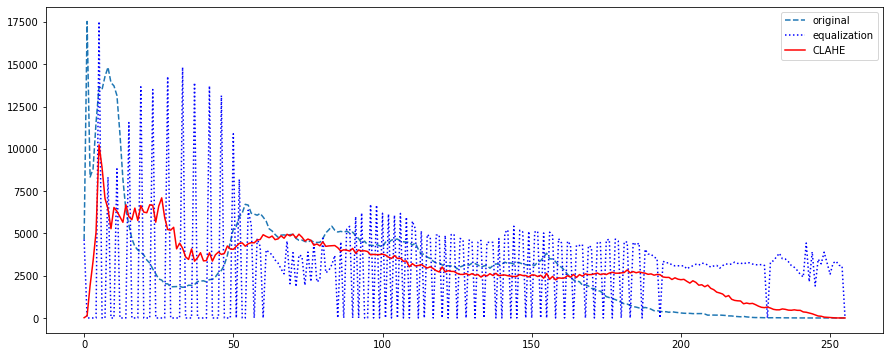

In [92]:
img = cv2.imread('src/flower1.jpg',0)

def equalization(img):
    hist, bins = np.histogram(img.flatten(), 256,[0,256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    return cdf[img]

def CLAHE(img, limit = 2.0, grid = 8):
    clahe = cv2.createCLAHE(clipLimit=limit, tileGridSize=(grid,grid))
    return clahe.apply(img)

img2 = equalization(img)
img3 = CLAHE(img)

hist1 = cv2.calcHist([img], [0], None, [256], [0,256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0,256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0,256])

resized  = []

for i in [img,img2,img3]:
    i = cv2.resize(i, (400,400))
    resized.append(i)

res = np.hstack(tuple(resized))

plt.figure(figsize = (15,6))
plt.plot(hist1,  label = 'original', linestyle = '--')
plt.plot(hist2, color = 'blue', label = 'equalization', linestyle = ':')
plt.plot(hist3,  label = 'CLAHE', linestyle = '-', color = 'red')
plt.legend()
plt.show()

cv2.imshow("Origianl vs Equalization vs CLAHE", res)
cv2.waitKey(0)
cv2.destroyAllWindows()



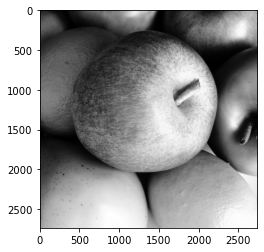

In [98]:
img = cv2.imread('src/image2.jpg',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = equalization(img)
plt.imshow(img)